In [1]:
import  datetime
from datetime import date
import calendar

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [3]:
# path to load and save folders
# create 2 folders - 1 for code and 1 for data / output
# run notebook from code folder
cwd = os.getcwd() ; print(cwd)
save_path = cwd[:-4] ; print(save_path)

C:\Users\gurdeep.singh\OneDrive\FinStuff\FatTailGain\fattailgain\fattailgain\eda_nifty_15yr\code
C:\Users\gurdeep.singh\OneDrive\FinStuff\FatTailGain\fattailgain\fattailgain\eda_nifty_15yr\


In [57]:
nifty = pd.read_csv(os.path.join(save_path,'data_output/nifty_15 yr_data.csv'))
print(nifty.shape)
nifty.head()

(4030, 10)


,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change
0,2005-01-03,2080.00,2118.60,2080.00,2115.00,70506865,2.375100e+10,NaN,NaN,NaN
1,2005-01-04,2116.95,2120.15,2100.55,2103.75,72718302,2.416130e+10,-11.25,NaN,NaN
2,2005-01-05,2103.75,2105.10,1990.15,2032.20,109223487,3.622020e+10,-71.55,-82.8,NaN
3,2005-01-06,2031.55,2035.65,1984.25,1998.35,94321939,3.233820e+10,-33.85,-105.4,-116.65
4,2005-01-07,1998.25,2021.45,1992.55,2015.50,76285818,2.764030e+10,17.15,-16.7,-88.25


In [58]:
# check dtypes since we are loading from a CSV
nifty.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Turnover        float64
daily_change    float64
2day_change     float64
3day_change     float64
dtype: object

In [59]:
# convert Date column from object to datetime to avoid problems later on
nifty['Date'] = pd.to_datetime(nifty['Date'])
# nifty.set_index('Date', inplace = True)
nifty.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Turnover               float64
daily_change           float64
2day_change            float64
3day_change            float64
dtype: object

In [60]:
# create a copy to avoid messing up the original df
nifty1 = nifty.copy()
nifty1.shape

(4030, 10)

In [61]:
# add year column for groupby later on
nifty1['year'] = nifty1['Date'].dt.year
nifty1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover',
       'daily_change', '2day_change', '3day_change', 'year'],
      dtype='object')

In [62]:
# drop values for year 2021 since only 3 months
nifty1.drop(index = nifty1[nifty1['year'] == 2021].index, inplace = True)
nifty1.tail(n=3)

,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change,year
3966,2020-12-29,13910.35,13967.60,13859.90,13932.60,439593961,2.515423e+11,59.40,183.35,331.50,2020
3967,2020-12-30,13980.90,13997.00,13864.95,13981.95,380681073,2.463312e+11,49.35,108.75,232.70,2020
3968,2020-12-31,13970.00,14024.85,13936.45,13981.75,452410109,2.630582e+11,-0.20,49.15,108.55,2020


In [63]:
# add column for daily return
nifty1['pct_change'] = nifty1['Close'].pct_change(periods = 1)
nifty1['daily_return_100rs'] = (1+nifty1['pct_change']).cumprod()*100
nifty1.tail(n=3)

,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change,year,pct_change,daily_return_100rs
3966,2020-12-29,13910.35,13967.60,13859.90,13932.60,439593961,2.515423e+11,59.40,183.35,331.50,2020,0.004282,658.751773
3967,2020-12-30,13980.90,13997.00,13864.95,13981.95,380681073,2.463312e+11,49.35,108.75,232.70,2020,0.003542,661.085106
3968,2020-12-31,13970.00,14024.85,13936.45,13981.75,452410109,2.630582e+11,-0.20,49.15,108.55,2020,-0.000014,661.075650


* Simple line plot below and showing value of rs 100 invested in nifty 15 years ago
* This is useful to show impact of missing down days and up days as we see later
* This is also somewhat time dependent - invest in peak of 2008 and redeem in 2020 but still 

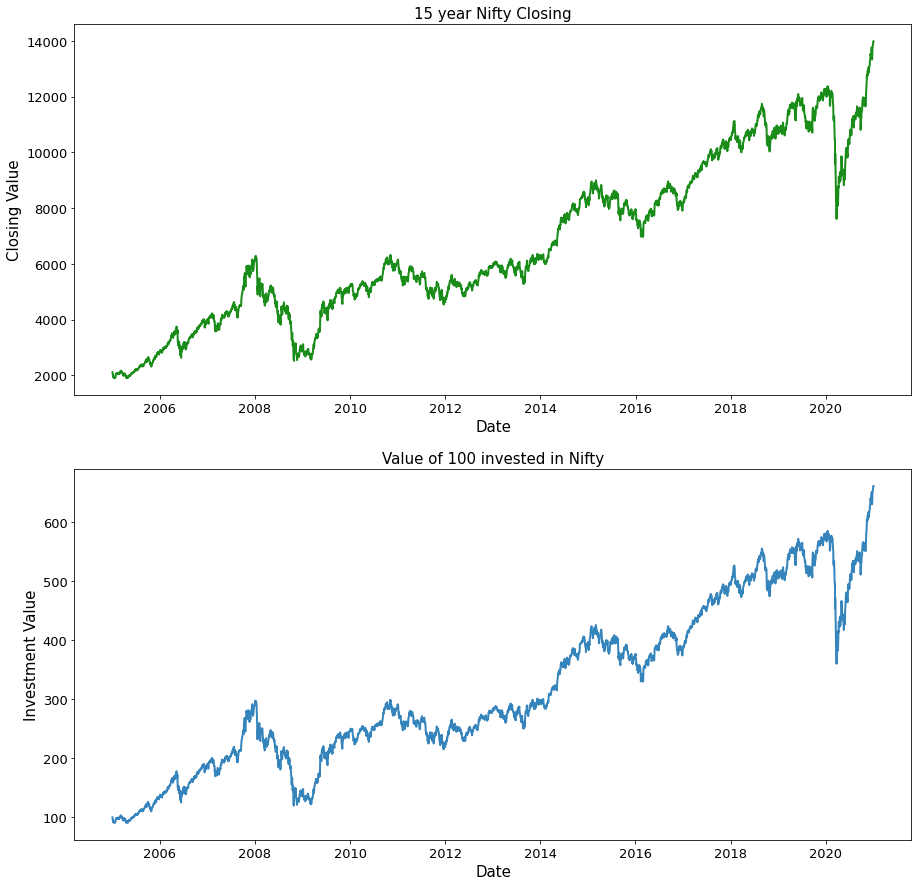

In [41]:
title_size = 15
tick_size = 13
label_size = 15

fig, axes = plt.subplots(figsize = (15,15), nrows = 2, ncols = 1, squeeze = False)
# plt.style.use('basic')
axes[0][0].plot(nifty1['Date'], nifty1['Close'], lw = 2, alpha = 0.9, c = 'g')
axes[0][0].set_title('15 year Nifty Closing', fontsize = title_size)
axes[0][0].tick_params(axis = 'x', labelsize = tick_size)
axes[0][0].tick_params(axis = 'y', labelsize = tick_size)
axes[0][0].set_xlabel('Date', fontsize = label_size)
axes[0][0].set_ylabel('Closing Value', fontsize = label_size);

axes[1][0].plot(nifty1['Date'], nifty1['daily_return_100rs'], lw = 2, alpha = 0.9)
axes[1][0].set_title('Value of 100 invested in Nifty', fontsize = title_size)
axes[1][0].set_xlabel('Date', fontsize = label_size)
axes[1][0].set_ylabel('Investment Value', fontsize = label_size)
axes[1][0].tick_params(axis = 'x', labelsize = tick_size)
axes[1][0].tick_params(axis = 'y', labelsize = tick_size)

fig.savefig(save_path + 'data_output/nifty_15yr_results.jpg', dpi = 700)

In [42]:
# calc 1sd, 2sd, 3sd of Nifty daily closing value 
nifty_1sd = np.std(nifty1['Close']); print(round(nifty_1sd,2))
nifty_2sd = nifty_1sd*2; print(round(nifty_2sd,2))
nifty_3sd = nifty_1sd*3; print(round(nifty_3sd,2))

2871.32
5742.64
8613.96


* This is the SD across all 15 years
* This may not provide much by way of insight since nifty is growing over a period of time
* Let's look at change in closing values over 1, 2, 3 days
* Let's write a function since we want to repeat this for 1 day, 2 day and 3 day changes

In [33]:
def mean_sd_calc(nifty_change, time = "1 day"):
    # calc 1sd, 2sd, 3sd
    # use absolute value for mean since changes are -ve and +ve
    # SD formula squares the difference from the mean so no need to take absolute value
    nifty_delta_mean = np.mean(abs(nifty_change))
    nifty_1sd = np.std(nifty_change)
    nifty_2sd = nifty_1sd*2
    nifty_3sd = nifty_1sd*3
    print(f'{time} change - Mean - {nifty_delta_mean:.2f},      1SD: {nifty_1sd:.2f}, 2SD: {nifty_2sd:.2f}, 3SD: {nifty_3sd:.2f}')
    
    # % of observations within 1sd, 2sd, 3sd; as seen below results are largely similar
    # take absolute value of change since changes are -ve also and we want to compare magnitude of change
    nifty_real_1sd = np.sum(np.where(abs(nifty_change) > nifty_1sd, 1, 0))
    nifty_real_1sdpct = round(nifty_real_1sd*100/nifty_change.shape[0],2)
    
    nifty_real_2sd = np.sum(np.where(abs(nifty_change) > nifty_2sd, 1, 0))
    nifty_real_2sdpct = round(nifty_real_2sd*100/nifty_change.shape[0],2)
    
    nifty_real_3sd = np.sum(np.where(abs(nifty_change) > nifty_3sd, 1, 0))
    nifty_real_3sdpct = round(nifty_real_3sd*100/nifty_change.shape[0],2)
    
    print(f'{time} change - Over SD Count -    1SD: {nifty_real_1sd:.2f}, 2SD: {nifty_real_2sd:.2f}, 3SD: {nifty_real_3sd:.2f}')
    print(f'{time} change - Over SD pct -      1SD  : {nifty_real_1sdpct:.2f}, 2SD: {nifty_real_2sdpct:.2f}, 3SD: {nifty_real_3sdpct:.2f}\n')
    # print(nifty_real_1sdpct); print(nifty_real_2sdpct); print(nifty_real_3sdpct)
    
    return nifty_delta_mean, nifty_1sd, nifty_2sd, nifty_3sd, nifty_real_1sd, nifty_real_2sd, nifty_real_3sd

In [34]:
nifty_1day_mean, nifty_1day_1sd, nifty_1day_2sd, nifty_1day_3sd, nifty_1day_1sd, nifty_1day_2sd, nifty_1day_3sd = mean_sd_calc(nifty1['daily_change'], '1day')
nifty_2day_mean, nifty_2day_1sd, nifty_2day_2sd, nifty_2day_3sd, nifty_2day_1sd, nifty_2day_2sd, nifty_2day_3sd = mean_sd_calc(nifty1['2day_change'], '2day')
nifty_3day_mean, nifty_3day_1sd, nifty_3day_2sd, nifty_3day_3sd, nifty_3day_1sd, nifty_3day_2sd, nifty_3day_3sd = mean_sd_calc(nifty1['3day_change'], '3day')

1day change - Mean - 57.26,      1SD: 85.33, 2SD: 170.66, 3SD: 255.99
1day change - Over SD Count -    1SD: 881.00, 2SD: 161.00, 3SD: 48.00
1day change - Over SD pct -      1SD  : 22.20, 2SD: 4.06, 3SD: 1.21

2day change - Mean - 85.52,      1SD: 121.51, 2SD: 243.02, 3SD: 364.53
2day change - Over SD Count -    1SD: 926.00, 2SD: 179.00, 3SD: 44.00
2day change - Over SD pct -      1SD  : 23.33, 2SD: 4.51, 3SD: 1.11

3day change - Mean - 106.15,      1SD: 150.86, 2SD: 301.71, 3SD: 452.57
3day change - Over SD Count -    1SD: 923.00, 2SD: 171.00, 3SD: 51.00
3day change - Over SD pct -      1SD  : 23.26, 2SD: 4.31, 3SD: 1.28



* As expected, there is greater change over more number of days in mean and SD.
* Let's compare these to a standard normal distribution

In [35]:
# compare this with the standard normal distribution
num_days = nifty1.shape[0]
std_normal = [round((1-.68)*num_days), round((1-.95)*num_days), round((1-.997)*num_days)]
nifty15yr_1day = [nifty_1day_1sd, nifty_1day_2sd, nifty_1day_3sd]
nifty15yr_2day = [nifty_2day_1sd, nifty_2day_2sd, nifty_2day_3sd]
nifty15yr_3day = [nifty_3day_1sd, nifty_3day_2sd, nifty_3day_3sd]

In [15]:
data = {'NumSD':[1,2,3], 'StdNormalDistbn': std_normal, 'NiftySDCount_1day': nifty15yr_1day, 'NiftySDCount_2day': nifty15yr_2day, 'NiftySDCount_3day': nifty15yr_3day}

nifty15yr_sdcomp = pd.DataFrame(data)
nifty15yr_sdcomp 
# 1st row - 1 SD change may include some of 2nd and 3rd rows
# 2nd row - 2 SD change may include some of 3rd row 

,NumSD,StdNormalDistbn,NiftySDCount_1day,NiftySDCount_2day,NiftySDCount_3day
0,1,1270,881,926,923
1,2,198,161,179,171
2,3,12,48,44,51


#### Interpretation

* Lesser changes over 1SD and 2SD but much higher changes over 3SD
* Almost 5 times!
* Let's see how this shows up on a plot

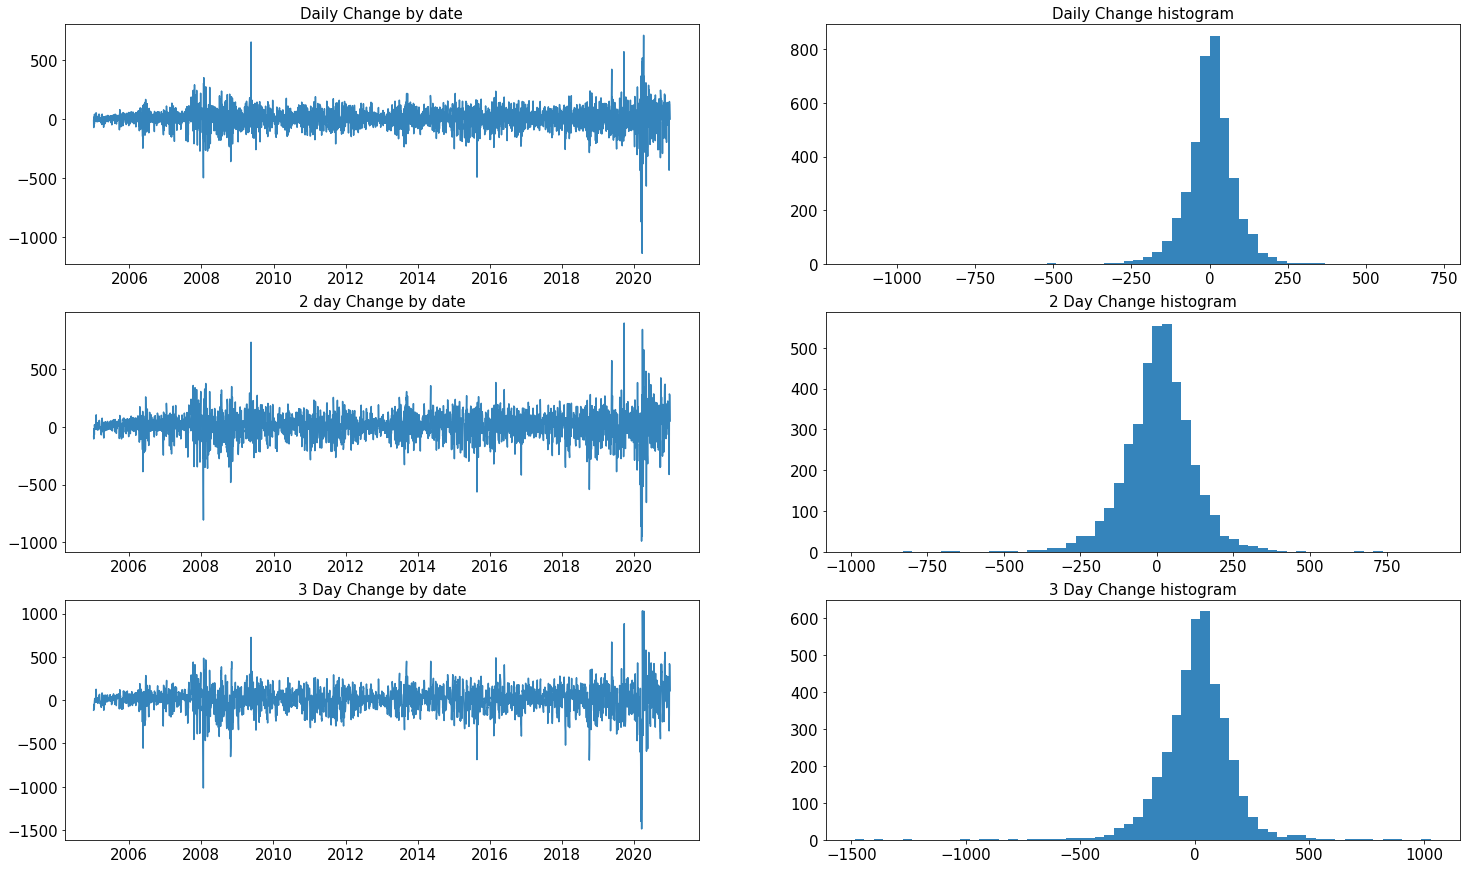

In [52]:
# visualise this over a histogram and line plot
# 6 plots for 1day, 2day and 3day changes - histogram and line plot

fig, ax = plt.subplots(3,2, figsize = (25,15))
ax[0][0].plot(nifty1['Date'], nifty1['daily_change'], alpha = 0.9)
ax[0][0].set_title('Daily Change by date', fontsize = title_size)
ax[0][0].tick_params(axis = 'y', labelsize = label_size)
ax[0][0].tick_params(axis = 'x', labelsize = label_size)

ax[0][1].hist(nifty1['daily_change'], bins = 60, alpha = 0.9)
ax[0][1].set_title('Daily Change histogram', fontsize = title_size)
ax[0][1].tick_params(axis = 'y', labelsize = label_size)
ax[0][1].tick_params(axis = 'x', labelsize = label_size)

ax[1][0].plot(nifty1['Date'], nifty1['2day_change'], alpha = 0.9)
ax[1][0].set_title('2 day Change by date', fontsize = title_size)
ax[1][0].tick_params(axis = 'y', labelsize = label_size)
ax[1][0].tick_params(axis = 'x', labelsize = label_size)

ax[1][1].hist(nifty1['2day_change'], bins = 60, alpha = 0.9)
ax[1][1].set_title('2 Day Change histogram', fontsize = title_size)
ax[1][1].tick_params(axis = 'y', labelsize = label_size)
ax[1][1].tick_params(axis = 'x', labelsize = label_size)

ax[2][0].plot(nifty1['Date'], nifty1['3day_change'], alpha = 0.9)
ax[2][0].set_title('3 Day Change by date', fontsize = title_size)
ax[2][0].tick_params(axis = 'y', labelsize = label_size)
ax[2][0].tick_params(axis = 'x', labelsize = label_size)

ax[2][1].hist(nifty1['3day_change'], bins = 60, alpha = 0.9)
ax[2][1].set_title('3 Day Change histogram', fontsize = title_size)
ax[2][1].tick_params(axis = 'y', labelsize = label_size)
ax[2][1].tick_params(axis = 'x', labelsize = label_size)

fig.savefig(save_path + 'data_output/nifty_change.jpg', dpi = 600)

#### Interpretation

* The volatility in daily, 2day and 3day returns is pretty obvious 
* The 50 plus days of over 3SD change don't even show up on the normal plot
* This is probably why we tend to discount it

#### Next Steps

* Curious if this pattern has been constant, increasing or decreasing
* NIFTY has grown from 2000 levels to 14000 levels over the past 16 years
* SD over large period may not provide much insight
* Let's do something similar for yearly changes over the annual SD and see how things hold up

In [65]:
# add year column to allow groupby later and copy relevant columns into a new df
nifty_data = nifty1[['year', 'Close', 'daily_change', '2day_change', '3day_change']]
print(nifty_data.shape)
nifty_data.head()                                         

(3969, 5)


,year,Close,daily_change,2day_change,3day_change
0,2005,2115.00,NaN,NaN,NaN
1,2005,2103.75,-11.25,NaN,NaN
2,2005,2032.20,-71.55,-82.8,NaN
3,2005,1998.35,-33.85,-105.4,-116.65
4,2005,2015.50,17.15,-16.7,-88.25


In [66]:
# create list of years for looping over
yr_list = nifty1['year'].unique().tolist(); yr_list
# yr_list = [int(a) for a in yr_list]
# yr_list = list(map(int, yr_list))
# yr_list = yr_list[:-1]; yr_list # drop 2021 since we have data for only 3 months

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [67]:
def mad_calc(nifty_yr):
    # calculate mean absolute deviation
    # source : https://www.tutorialspoint.com/absolute-deviation-and-absolute-mean-deviation-using-numpy
    m = np.mean(nifty_yr)
    mad = (np.sum(abs(nifty_yr - m)))/len(nifty_yr)
    # print(mad)
    return mad

In [68]:
# create empty df to store results by year
delta_1day = pd.DataFrame({'value': ['trading_days', 'mean', 'SD', 'MAD', 'sd_mad_ratio', 'sd_mad_delta', 'days_1sd', 'days_2sd', 'days_3sd']})
delta_2day = delta_1day.copy()
delta_3day = delta_1day.copy()

In [69]:
# function to call in the loop
def sd_count(nifty_yr):
    yr_values = [] # empty list to store values
    sd_mad_ratio = np.sqrt(np.pi/2)# = ~1.25 for std normal distbn
    
    yr_count = len(nifty_yr)
    yr_mean = np.mean(nifty_yr)
    yr_sd = np.std(nifty_yr)# ; print(yr_sd)
    yr_mad = mad_calc(nifty_yr) # call the function for MAD calculation
    yr_sd_mad_ratio = yr_sd/yr_mad # sd to MAD ratio
    yr_sd_mad_delta = yr_sd_mad_ratio > sd_mad_ratio # value 1 if ratio is greater than for Std Normal 
    
    yr_days_1sd = np.sum(np.where(abs(nifty_yr) > yr_sd, 1, 0)) # num days where change > 1SD
    yr_days_2sd = np.sum(np.where(abs(nifty_yr) > 2*yr_sd, 1, 0)) # num days where change > 2SD
    yr_days_3sd = np.sum(np.where(abs(nifty_yr) > 3*yr_sd, 1, 0)) # num days where change > 3SD
    
    yr_values = yr_values + [yr_count, yr_mean, yr_sd, yr_mad, yr_sd_mad_ratio, yr_sd_mad_delta, yr_days_1sd, yr_days_2sd, yr_days_3sd]
    return yr_values

In [70]:
# loop over all years
for yr in yr_list:
    # print(type(yr))
    temp_df = nifty_data[nifty_data['year'].isin([yr])]
    # print(temp_df.year.unique())
    delta_1day[yr] = sd_count(temp_df['daily_change'])

delta_1day.set_index('value', inplace = True)
delta_1day # 1 day change across 15 years

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
value,,,,,,,,,,,,,,,,
trading_days,251,250,249,246,243,252,247,251,250,244,248,247,248,246,245,252
mean,2.8862,4.5194,8.72369,-12.9246,9.22593,3.70417,-6.11417,5.10279,1.5956,8.10943,-1.35625,0.969433,9.45524,1.34898,5.3302,7.19563
SD,25.4495,52.9028,75.8344,113.213,82.5576,55.376,69.1379,50.1748,66.0053,58.585,84.1014,75.1167,54.3917,86.19,97.641,190.044
MAD,19.8907,37.3687,53.1687,85.777,58.0997,42.9289,55.4465,37.9888,49.2424,44.064,62.4095,56.1734,41.8541,67.5413,72.7159,125.436
sd_mad_ratio,1.27947,1.4157,1.4263,1.31985,1.42096,1.28995,1.24693,1.32078,1.34042,1.32954,1.34757,1.33723,1.29955,1.27611,1.34277,1.51507
sd_mad_delta,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
days_1sd,75,62,61,68,60,76,77,70,68,76,62,75,85,73,62,47
days_2sd,13,18,14,13,5,17,11,17,13,13,10,13,11,15,6,11
days_3sd,2,3,5,3,2,1,1,0,4,1,1,3,0,2,3,4


* This seems wrong - mean of 1 day change is very small ranging from 2.89 to 7.20 while 
* SD ranges from 25 to 190; MAD also follows a similar pattern
* If you know your SD formulas then you know that SD and MAD are invariant for +ve and -ve numbers
* Also for true normal distribution SD/MAD ration = sqrt(pi/2) - https://www.youtube.com/watch?v=iKJy2YpYPe8
https://www.macroption.com/standard-deviation-of-negative-numbers/
* Greater the ratio; farther away from standard normal distribution is the distribution
* This probably has to do with the fact that we are taking mean of both +ve and -ve values while the same is squared in SD
* Lets take mean of absolute change 

In [71]:
# function to call in the loop
def sd_count2(nifty_yr):
    yr_list = [] # empty list to store values
    sd_mad_ratio = np.sqrt(np.pi/2)# = ~1.25 for std normal distbn
    
    yr_count = len(nifty_yr)
    yr_mean = np.mean(abs(nifty_yr)) # take mean of absolute value
    yr_sd = np.std(nifty_yr)# ; print(yr_sd)
    yr_mad = mad_calc(nifty_yr) # call the function for MAD calculation
    yr_sd_mad_ratio = yr_sd/yr_mad # sd to MAD ratio
    yr_sd_mad_delta = yr_sd_mad_ratio > sd_mad_ratio # value 1 if ratio is greater than for Std Normal 
    
    yr_days_1sd = np.sum(np.where(abs(nifty_yr) > yr_sd, 1, 0)) # num days where change > 1SD
    yr_days_2sd = np.sum(np.where(abs(nifty_yr) > (2*yr_sd), 1, 0)) # num days where change > 2SD
    yr_days_3sd = np.sum(np.where(abs(nifty_yr) > (3*yr_sd), 1, 0)) # num days where change > 3SD
    
    yr_list = yr_list + [yr_count, yr_mean, yr_sd, yr_mad, yr_sd_mad_ratio, yr_sd_mad_delta, yr_days_1sd, yr_days_2sd, yr_days_3sd]
    return yr_list

In [72]:
# loop over all years
for yr in yr_list:
    # print(type(yr))
    temp_df = nifty_data[nifty_data['year'].isin([yr])]
    # print(temp_df.year.unique())
    delta_1day[yr] = sd_count2(temp_df['daily_change'])
    delta_2day[yr] = sd_count2(temp_df['2day_change']) # add columns for every year
    delta_3day[yr] = sd_count2(temp_df['3day_change'])

In [73]:
# delta_1day.set_index('value', inplace = True) # done already
delta_1day # 1 day change across 15 years

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
value,,,,,,,,,,,,,,,,
trading_days,251,250,249,246,243,252,247,251,250,244,248,247,248,246,245,252
mean,20.2122,38.113,53.4418,85.8888,58.5844,43.2383,56.151,38.3211,49.2436,44.891,62.4264,56.2136,42.5089,67.6356,72.8763,126.681
SD,25.4495,52.9028,75.8344,113.213,82.5576,55.376,69.1379,50.1748,66.0053,58.585,84.1014,75.1167,54.3917,86.19,97.641,190.044
MAD,19.8907,37.3687,53.1687,85.777,58.0997,42.9289,55.4465,37.9888,49.2424,44.064,62.4095,56.1734,41.8541,67.5413,72.7159,125.436
sd_mad_ratio,1.27947,1.4157,1.4263,1.31985,1.42096,1.28995,1.24693,1.32078,1.34042,1.32954,1.34757,1.33723,1.29955,1.27611,1.34277,1.51507
sd_mad_delta,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
days_1sd,75,62,61,68,60,76,77,70,68,76,62,75,85,73,62,47
days_2sd,13,18,14,13,5,17,11,17,13,13,10,13,11,15,6,11
days_3sd,2,3,5,3,2,1,1,0,4,1,1,3,0,2,3,4


In [74]:
delta_2day.set_index('value', inplace = True)
delta_2day

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
value,,,,,,,,,,,,,,,,
trading_days,251,250,249,246,243,252,247,251,250,244,248,247,248,246,245,252
mean,30.6721,55.5726,83.0629,125.825,85.6837,60.6327,84.7356,55.9932,77.8806,72.2248,95.8276,85.1988,65.7641,95.9872,107.012,186.33
SD,38.5179,77.3709,112.293,163.13,118.402,77.0966,102.825,69.7044,98.6145,89.8247,121.983,109.217,81.0489,124.155,142.444,254.636
MAD,29.5897,53.6368,81.4759,124.698,85.4154,59.9993,84.326,55.4877,78.1101,71.1351,95.9924,85.2314,63.1042,95.5874,106.258,184.832
sd_mad_ratio,1.30173,1.4425,1.37823,1.3082,1.3862,1.28496,1.21938,1.25621,1.26251,1.26273,1.27076,1.28142,1.28436,1.29886,1.34055,1.37766
sd_mad_delta,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
days_1sd,77,59,59,61,69,77,80,78,78,80,70,82,82,66,59,62
days_2sd,12,12,18,12,7,11,14,13,11,15,11,8,13,14,7,14
days_3sd,0,4,4,2,2,0,0,0,2,1,2,2,1,2,3,5


In [75]:
delta_3day.set_index('value', inplace = True)
delta_3day

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
value,,,,,,,,,,,,,,,,
trading_days,251,250,249,246,243,252,247,251,250,244,248,247,248,246,245,252
mean,37.8577,68.4286,106.821,156.063,108.982,75.5323,104.744,70.5151,95.2662,88.3449,120.306,102.438,82.969,121.59,134.242,224.291
SD,46.5749,94.3983,138.351,202.951,143.377,95.3661,129.513,86.2883,119.701,109.817,148.824,132.383,100.56,156.774,176.254,318.854
MAD,36.2198,65.2404,102.715,155.504,107.333,74.6534,103.328,69.4108,95.1898,85.6018,120.501,102.366,78.2401,120.986,133.331,221.802
sd_mad_ratio,1.28589,1.44693,1.34694,1.30512,1.33582,1.27745,1.25341,1.24315,1.2575,1.28288,1.23505,1.29323,1.28528,1.2958,1.32193,1.43756
sd_mad_delta,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True
days_1sd,76,56,73,65,64,82,84,81,84,78,77,71,82,68,68,59
days_2sd,16,14,17,12,7,13,9,15,8,11,7,10,17,10,9,10
days_3sd,0,4,2,3,3,0,0,0,1,2,3,4,0,3,3,5


#### Interpretation

* As expected - the actual value of standard deviation goes up over the years - from 46 points in 2005 to 318 points in 2020
* Implies - fat tail events require greater swing and daily changes in 100s of points may not have a great impact except for on news channels
* SD MAD ratio > 1.25 for most years ==> definetely not normal
* Last 3 rows of each dataframe list out for each unit of analysis - 1day change, total 2 day change and total 3 day change; how many days were these changes over that of a std normal distribution
* eg - for the dataframe delta_3day column 2020
    * days_1sd = 59 - means that for 59 groups of 3 days in the year 2020
    * The change was greater than 1SD of the 250 observations (252 trading days - 2)
* Similarly for days_2sd and days_3sd

So what does this mean?

* Actual values of days_1sd, days_2sd and days_3sd don't vary much across all 1day, 2day and 3day changes. 
* Plotting these values into a single DF for easier understanding below.

In [76]:
# put values into separate dataframe for easy plotting
delta_1sd = pd.DataFrame()
delta_1sd['1day_change'] = delta_1day.loc['days_1sd',:]
delta_1sd['2day_change'] = delta_2day.loc['days_1sd',:]
delta_1sd['3day_change'] = delta_3day.loc['days_1sd',:]

delta_2sd = pd.DataFrame()
delta_2sd['1day_change'] = delta_1day.loc['days_2sd',:]
delta_2sd['2day_change'] = delta_2day.loc['days_2sd',:]
delta_2sd['3day_change'] = delta_3day.loc['days_2sd',:]

delta_3sd = pd.DataFrame()
delta_3sd['1day_change'] = delta_1day.loc['days_3sd',:]
delta_3sd['2day_change'] = delta_2day.loc['days_3sd',:]
delta_3sd['3day_change'] = delta_3day.loc['days_3sd',:]

mad_sad_df = pd.DataFrame()
mad_sad_df['1day_ratio'] = delta_1day.loc['sd_mad_ratio',:]
mad_sad_df['2day_ratio'] = delta_2day.loc['sd_mad_ratio',:]
mad_sad_df['3day_ratio'] = delta_3day.loc['sd_mad_ratio',:]

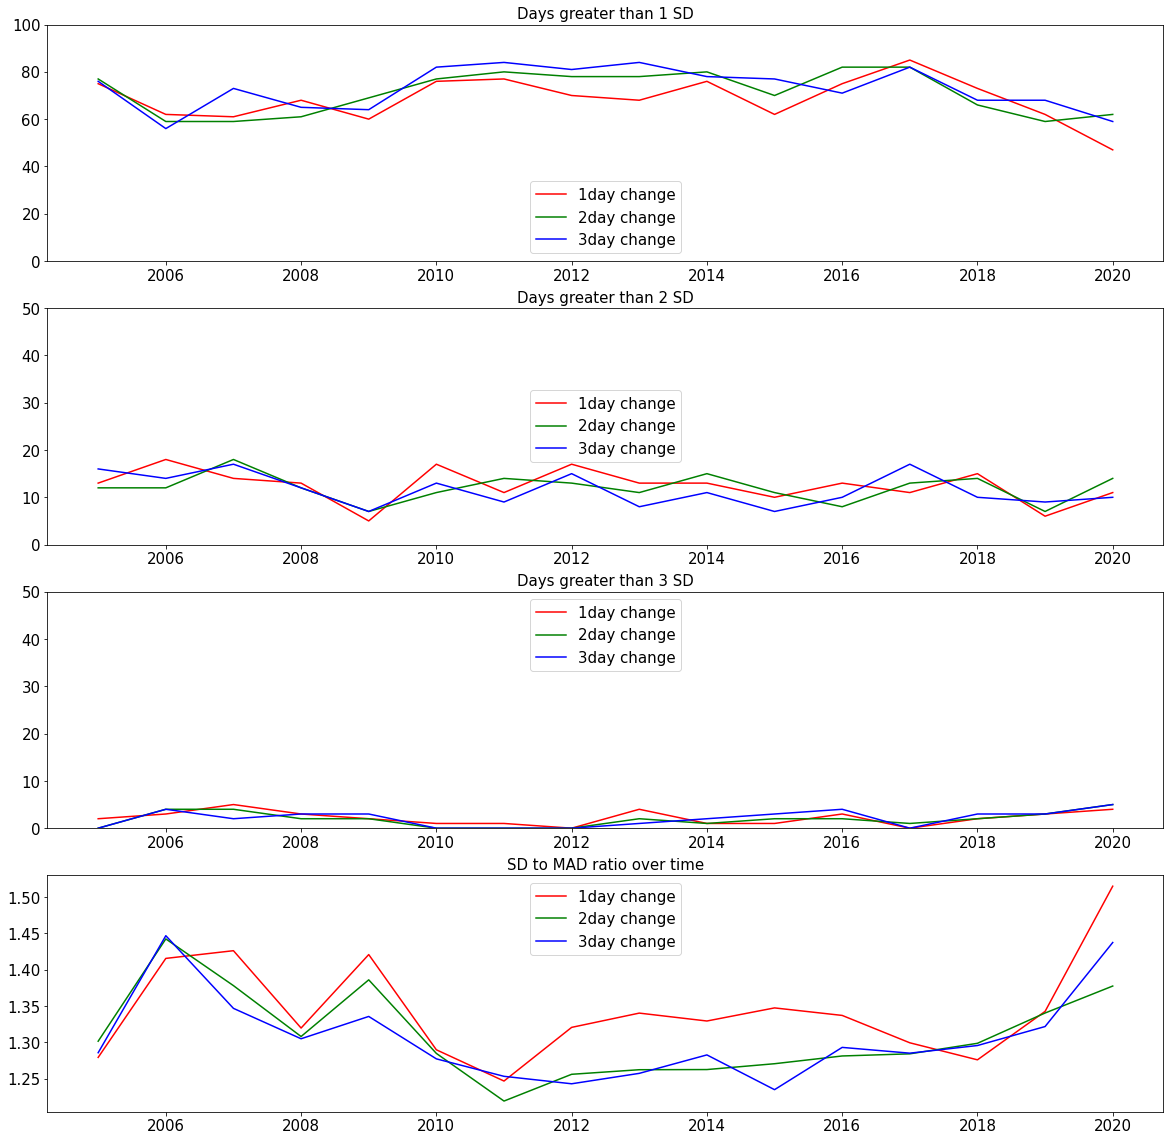

In [89]:
fig, ax = plt.subplots(4,1, figsize = (20,20), squeeze = False)

ax[0][0].plot(delta_1sd['1day_change'], color = 'r')
ax[0][0].plot(delta_1sd['2day_change'], color = 'g')
ax[0][0].plot(delta_1sd['3day_change'], color = 'b')
ax[0][0].set_title('Days greater than 1 SD', fontsize = title_size)
ax[0][0].legend(['1day change', '2day change', '3day change'], loc = 'lower center', fontsize = label_size)
ax[0][0].tick_params(axis = 'x', labelsize = label_size)
ax[0][0].tick_params(axis = 'y', labelsize = label_size)
ax[0][0].set_ylim(0,100)

ax[1][0].plot(delta_2sd['1day_change'], color = 'r')
ax[1][0].plot(delta_2sd['2day_change'], color = 'g')
ax[1][0].plot(delta_2sd['3day_change'], color = 'b')
ax[1][0].set_title('Days greater than 2 SD', fontsize = title_size)
ax[1][0].legend(['1day change', '2day change', '3day change'], loc = 'center', fontsize = label_size)
ax[1][0].tick_params(axis = 'x', labelsize = label_size)
ax[1][0].tick_params(axis = 'y', labelsize = label_size)
ax[1][0].set_ylim(0,50)

ax[2][0].plot(delta_3sd['1day_change'], color = 'r')
ax[2][0].plot(delta_3sd['2day_change'], color = 'g')
ax[2][0].plot(delta_3sd['3day_change'], color = 'b')
ax[2][0].set_title('Days greater than 3 SD', fontsize = title_size)
ax[2][0].legend(['1day change', '2day change', '3day change'], loc = 'upper center', fontsize = label_size)
ax[2][0].tick_params(axis = 'x', labelsize = label_size)
ax[2][0].tick_params(axis = 'y', labelsize = label_size)
ax[2][0].set_ylim(0,50);

ax[3][0].plot(mad_sad_df['1day_ratio'], color = 'r')
ax[3][0].plot(mad_sad_df['2day_ratio'], color = 'g')
ax[3][0].plot(mad_sad_df['3day_ratio'], color = 'b')
ax[3][0].set_title('SD to MAD ratio over time', fontsize = title_size)
ax[3][0].legend(['1day change', '2day change', '3day change'], loc = 'upper center', fontsize = label_size)
ax[3][0].tick_params(axis = 'x', labelsize = label_size)
ax[3][0].tick_params(axis = 'y', labelsize = label_size)

fig.savefig(save_path + 'data_output/annual_sd_comp.jpg', dpi = 600)

#### Interpretation

* Ignore the absolute values; focus on fact that all lines are pretty close to each other
* Can mean that most changes happen in the same day
* Fact that we have such changes is not a big deal by itself or that fat tails exist
* In order to determine that we have to compare this pattern with the standard normal distribution
* Since the values are so close to each other we take a simple average of all years

In [91]:
# create new df
fat_tail_df = pd.DataFrame({'value': ['SD_MAD_ratio','days_over_1sd', 'days_over_2sd', 'days_over_3sd']})


# add expected values per standard normal distribution
num_days = np.mean(delta_3day.iloc[0,:]); # print(num_days) # average number of trading days
std_normal = [(1-.68)*num_days, (1-.95)*num_days, (1-.997)*num_days]
std_normal.insert(0, np.sqrt(np.pi/2)) # = ~1.25 for std normal dist
# print(std_normal)

fat_tail_df['Norml_dist_exp'] = std_normal
fat_tail_df['1day_change'] = [np.mean(delta_1day.loc['sd_mad_ratio',:]), np.mean(delta_1day.loc['days_1sd',:]),np.mean(delta_1day.loc['days_2sd',:]), np.mean(delta_1day.loc['days_3sd',:])]
fat_tail_df['2day_change'] = [np.mean(delta_2day.loc['sd_mad_ratio',:]), np.mean(delta_2day.loc['days_1sd',:]),np.mean(delta_2day.loc['days_2sd',:]), np.mean(delta_2day.loc['days_3sd',:])]
fat_tail_df['3day_change'] = [np.mean(delta_3day.loc['sd_mad_ratio',:]), np.mean(delta_3day.loc['days_1sd',:]),np.mean(delta_3day.loc['days_2sd',:]), np.mean(delta_3day.loc['days_3sd',:])]
fat_tail_df = fat_tail_df.round(2)

fat_tail_df

,value,Norml_dist_exp,1day_change,2day_change,3day_change
0,SD_MAD_ratio,1.25,1.34,1.31,1.31
1,days_over_1sd,79.38,68.56,71.19,73.00
2,days_over_2sd,12.40,12.50,12.00,11.56
3,days_over_3sd,0.74,2.19,1.88,2.06


#### Interpretation

* Fat tails definetely exist
* Average number of days over 1SD and 2SD similar to standard normal
* For 3 SD change; as per normal distbn we expect 0.75 days but we have 2 days with over 3SD change on an average

**Question: Are these deviations positive or negative or both?**

* Focus on 1day changes
* Look at number of changes > 2SD for 1day changes (daily returns) across the year
* Use values of SD for each year to compute deviation

In [92]:
val = 2 # plug for calculating deviations greater than 1, 2 or 3 SD
sd_1day = pd.DataFrame(delta_1day.loc['SD',:].transpose().reset_index())
sd_1day['SD'] = val*sd_1day['SD']
sd_1day.columns = ['year', 'SD']
d = dict(zip(sd_1day['year'], sd_1day['SD'])); d

{2005: 50.89895164185604,
 2006: 105.80564434168905,
 2007: 151.66887337822524,
 2008: 226.42588132788916,
 2009: 165.11511518332517,
 2010: 110.75195961038204,
 2011: 138.27586962271016,
 2012: 100.34965865808297,
 2013: 132.0105404979466,
 2014: 117.17007942916665,
 2015: 168.2027145753723,
 2016: 150.2334190179004,
 2017: 108.78332623848117,
 2018: 172.3800312056779,
 2019: 195.28194798290164,
 2020: 380.08803116083635}

In [93]:
# group total of positive and nengative values by year
pos_delta = nifty1.groupby(['year']).agg({'pos_delta': 'sum'}); print(pos_delta)
neg_delta = nifty1.groupby(['year']).agg({'neg_delta' : 'sum'}); print(neg_delta)
nifty1['pos_delta'] = np.where(nifty1['daily_change'] > nifty1['pos_sd_1day'], 1, 0)
nifty1['neg_delta'] = np.where(nifty1['daily_change'] < (-val*nifty1['pos_sd_1day']), 1, 0)
nifty1.head()

,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change,year,pct_change,daily_return_100rs,pos_sd_1day,pos_delta,neg_delta
0,2005-01-03,2080.00,2118.60,2080.00,2115.00,70506865,2.375100e+10,NaN,NaN,NaN,2005,NaN,NaN,50.898952,0,0
1,2005-01-04,2116.95,2120.15,2100.55,2103.75,72718302,2.416130e+10,-11.25,NaN,NaN,2005,-0.005319,99.468085,50.898952,0,0
2,2005-01-05,2103.75,2105.10,1990.15,2032.20,109223487,3.622020e+10,-71.55,-82.8,NaN,2005,-0.034011,96.085106,50.898952,0,0
3,2005-01-06,2031.55,2035.65,1984.25,1998.35,94321939,3.233820e+10,-33.85,-105.4,-116.65,2005,-0.016657,94.484634,50.898952,0,0
4,2005-01-07,1998.25,2021.45,1992.55,2015.50,76285818,2.764030e+10,17.15,-16.7,-88.25,2005,0.008582,95.295508,50.898952,0,0


In [94]:
# group total of positive and nengative values by year
pos_delta = nifty1.groupby(['year']).agg({'pos_delta': 'sum'}); print(pos_delta)
neg_delta = nifty1.groupby(['year']).agg({'neg_delta' : 'sum'}); print(neg_delta)

      pos_delta
year           
2005          4
2006          6
2007          7
2008          5
2009          2
2010          7
2011          7
2012         11
2013          7
2014          8
2015          2
2016          4
2017          6
2018          7
2019          4
2020          3
      neg_delta
year           
2005          0
2006          1
2007          0
2008          1
2009          0
2010          0
2011          0
2012          0
2013          0
2014          0
2015          1
2016          0
2017          0
2018          0
2019          0
2020          2


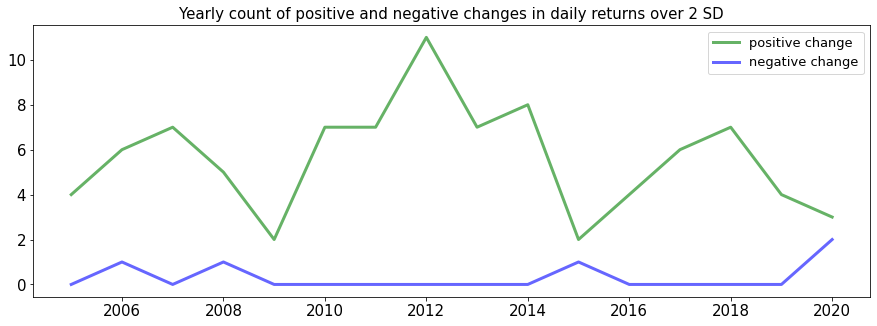

In [100]:
# plot both on graph
plt.figure(figsize = (15,5))
plt.plot(pos_delta, lw = 3, alpha = 0.6, color = 'g')
plt.plot(neg_delta, lw = 3, alpha = 0.6, color = 'b')
plt.legend(['positive change', 'negative change'],loc = 'upper right', fontsize = tick_size)
plt.title(f'Yearly count of positive and negative changes in daily returns over {val} SD', fontsize = label_size)
plt.tick_params(axis = 'x', labelsize = label_size)
plt.tick_params(axis = 'y', labelsize = label_size)

plt.savefig(save_path + 'data_output/pos_neg_delta.jpg', dpi = 900)

#### So we have fat tails - what next?

* From the chart above we can see that high volatility events or fat tail events are present on both sides
* Let's explore the impact of being able to 
    * Reduce the impact of negative fat tails or 
    * Make an additional gain from them
* Let's assume for 3 day changes we are able to
    * Manage a protection of ~50% of all negative changes over 2D and/or
    * Caputre 50% addiitonal upside of a positive change
    * Why 50% - In a real world scenario we may not be able to capture the full gain on account of timing, liquidity, costs or taxes.

In [101]:
# capture addiitonal 50% of upside - daily percent change
nifty1['pct_change_pos'] = np.where(nifty1['pos_delta'] == 1, nifty1['pct_change'] * 1.5, nifty1['pct_change'])

# protect 50% of downside - daily percent change
nifty1['pct_change_neg'] = np.where(nifty1['neg_delta'] == 1, nifty1['pct_change'] * 0.5, nifty1['pct_change'])

In [102]:
# nifty1.loc[nifty1['pos_delta'] != 0] # check

In [104]:
nifty1.tail(n=3)

,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change,year,pct_change,daily_return_100rs,pos_sd_1day,pos_delta,neg_delta,pct_change_pos,pct_change_neg
3966,2020-12-29,13910.35,13967.60,13859.90,13932.60,439593961,2.515423e+11,59.40,183.35,331.50,2020,0.004282,658.751773,380.088031,0,0,0.004282,0.004282
3967,2020-12-30,13980.90,13997.00,13864.95,13981.95,380681073,2.463312e+11,49.35,108.75,232.70,2020,0.003542,661.085106,380.088031,0,0,0.003542,0.003542
3968,2020-12-31,13970.00,14024.85,13936.45,13981.75,452410109,2.630582e+11,-0.20,49.15,108.55,2020,-0.000014,661.075650,380.088031,0,0,-0.000014,-0.000014


In [105]:
# conditions = [(nifty1['pos_delta'] == 1), (nifty1['neg_delta'] == 1), (nifty1['pos_delta'] == 0 & nifty1['neg_delta'] == 0)]

conditions = [nifty1['pos_delta'] == 1, nifty1['neg_delta'] == 1]
choices = [nifty1['pct_change_pos'], nifty1['pct_change_neg']]

nifty1['pct_change_both'] = np.select(conditions, choices, nifty1['pct_change'])

In [106]:
nifty1['pos_retrn_100rs'] = (1+nifty1['pct_change_pos']).cumprod()*100
nifty1['neg_retrn_100rs'] = (1+nifty1['pct_change_neg']).cumprod()*100
nifty1['pos_neg_retrn_100rs'] = (1+nifty1['pct_change_both']).cumprod()*100

In [107]:
nifty1.tail(n=3)

,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change,...,daily_return_100rs,pos_sd_1day,pos_delta,neg_delta,pct_change_pos,pct_change_neg,pct_change_both,pos_retrn_100rs,neg_retrn_100rs,pos_neg_retrn_100rs
3966,2020-12-29,13910.35,13967.60,13859.90,13932.60,439593961,2.515423e+11,59.40,183.35,331.50,...,658.751773,380.088031,0,0,0.004282,0.004282,0.004282,2646.352010,828.604724,3328.688995
3967,2020-12-30,13980.90,13997.00,13864.95,13981.95,380681073,2.463312e+11,49.35,108.75,232.70,...,661.085106,380.088031,0,0,0.003542,0.003542,0.003542,2655.725527,831.539686,3340.479386
3968,2020-12-31,13970.00,14024.85,13936.45,13981.75,452410109,2.630582e+11,-0.20,49.15,108.55,...,661.075650,380.088031,0,0,-0.000014,-0.000014,-0.000014,2655.687540,831.527791,3340.431604


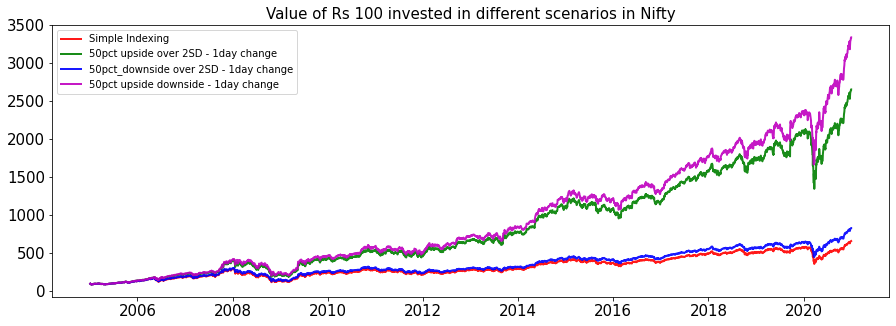

In [114]:
plt.figure(figsize = (15,5))
plt.plot(nifty1['Date'], nifty1['daily_return_100rs'], lw = 2, alpha = 0.9, c = 'r', label = 'Simple Indexing')
plt.plot(nifty1['Date'], nifty1['pos_retrn_100rs'], lw = 2, alpha = 0.9, c = 'g', label = '50pct upside over 2SD - 1day change')
plt.plot(nifty1['Date'], nifty1['neg_retrn_100rs'], lw = 2, alpha = 0.9, c = 'b', label = '50pct_downside over 2SD - 1day change')
plt.plot(nifty1['Date'], nifty1['pos_neg_retrn_100rs'], lw = 2, alpha = 0.9, c = 'm', label = '50pct upside downside - 1day change')
plt.title('Value of Rs 100 invested in different scenarios in Nifty', fontsize = title_size)
plt.tick_params(axis = 'x', labelsize = label_size)
plt.tick_params(axis = 'y', labelsize = label_size)
plt.legend(loc = 'best')

plt.savefig(save_path + 'data_output/upside_downside.jpg', dpi = 600)

In [42]:
# save to csv for future use
nifty.to_csv(save_path+"data_output/nifty_15_yr_EDA_results.csv")

#### What does the above chart mean?

* There is a definite benefit to upside or downside protection - something we knew already
* Impact of this comes clear in a portfolio over 10 year time frame
* Compounding is obviously helpful 

### Exploring the same thing in a different way - ignore below

In [43]:
# add columns to show extreme changes - 100, 200, 300, 500 and 700 point changes over 1, 2 and 3 days
nifty1['1day100'] = np.where(((abs(nifty1['daily_change']) > 100) & (abs(nifty1['daily_change']) < 200)), 1, 0)
nifty1['1day200'] = np.where(((abs(nifty1['daily_change']) > 200) & (abs(nifty1['daily_change']) < 300)), 1, 0)
nifty1['1day300'] = np.where(((abs(nifty1['daily_change']) > 300) & (abs(nifty1['daily_change']) < 500)), 1, 0)
nifty1['1day500'] = np.where(((abs(nifty1['daily_change']) > 500) & (abs(nifty1['daily_change']) < 700)), 1, 0)
nifty1['1day700'] = np.where(abs(nifty1['daily_change']) > 700, 1, 0)

nifty1['2day100'] = np.where(((abs(nifty1['2day_change']) > 100) & (abs(nifty1['2day_change']) < 200)), 1, 0)
nifty1['2day200'] = np.where(((abs(nifty1['2day_change']) > 200) & (abs(nifty1['2day_change']) < 300)), 1, 0)
nifty1['2day300'] = np.where(((abs(nifty1['2day_change']) > 300) & (abs(nifty1['2day_change']) < 500)), 1, 0)
nifty1['2day500'] = np.where(((abs(nifty1['2day_change']) > 500) & (abs(nifty1['2day_change']) < 700)), 1, 0)
nifty1['2day700'] = np.where(abs(nifty1['2day_change']) > 700, 1, 0)

nifty1['3day100'] = np.where(((abs(nifty1['3day_change']) > 100) & (abs(nifty1['3day_change']) < 200)), 1, 0)
nifty1['3day200'] = np.where(((abs(nifty1['3day_change']) > 200) & (abs(nifty1['3day_change']) < 300)), 1, 0)
nifty1['3day300'] = np.where(((abs(nifty1['3day_change']) > 300) & (abs(nifty1['3day_change']) < 500)), 1, 0)
nifty1['3day500'] = np.where(((abs(nifty1['3day_change']) > 500) & (abs(nifty1['3day_change']) < 700)), 1, 0)
nifty1['3day700'] = np.where(abs(nifty1['3day_change']) > 700, 1, 0)

print(nifty1.shape)
nifty1.head()

(3969, 37)


,Date,Open,High,Low,Close,Volume,Turnover,daily_change,2day_change,3day_change,...,2day100,2day200,2day300,2day500,2day700,3day100,3day200,3day300,3day500,3day700
0,2005-01-03,2080.00,2118.60,2080.00,2115.00,70506865,2.375100e+10,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2005-01-04,2116.95,2120.15,2100.55,2103.75,72718302,2.416130e+10,-11.25,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2005-01-05,2103.75,2105.10,1990.15,2032.20,109223487,3.622020e+10,-71.55,-82.8,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2005-01-06,2031.55,2035.65,1984.25,1998.35,94321939,3.233820e+10,-33.85,-105.4,-116.65,...,1,0,0,0,0,1,0,0,0,0
4,2005-01-07,1998.25,2021.45,1992.55,2015.50,76285818,2.764030e+10,17.15,-16.7,-88.25,...,0,0,0,0,0,0,0,0,0,0


In [44]:
nifty_change = nifty1[['1day100', '1day200', '1day300','1day500', '1day700','2day100','2day200', '2day300', '2day500','2day700','3day100','3day200', '3day300', '3day500', '3day700']]
nifty_change.head()

,1day100,1day200,1day300,1day500,1day700,2day100,2day200,2day300,2day500,2day700,3day100,3day200,3day300,3day500,3day700
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
total = nifty_change.sum(); total

1day100     533
1day200      66
1day300      22
1day500       5
1day700       4
2day100     956
2day200     208
2day300      64
2day500      12
2day700      12
3day100    1104
3day200     332
3day300     135
3day500      22
3day700      15
dtype: int64

In [46]:
a = total.to_numpy().reshape((3,5), order = 'c');a

array([[ 533,   66,   22,    5,    4],
       [ 956,  208,   64,   12,   12],
       [1104,  332,  135,   22,   15]], dtype=int64)

In [47]:
nifty_swings = pd.DataFrame(a, index = ['1day', '2days', '3days'], columns = ['100pts', '200pts', '300pts', '500pts', '700pts',])
nifty_swings

,100pts,200pts,300pts,500pts,700pts
1day,533,66,22,5,4
2days,956,208,64,12,12
3days,1104,332,135,22,15
